#Abstract

Cardiovascular diseases are one of the leading causes of morbidity and mortality worldwide. It is essential for healthcare professionals to be able to identify patients at higher risk of developing these diseases in order to provide personalized treatments and preventive advice. A healthcare team is seeking to identify patterns in medical data of patients that demonstrate health risks in patients with specific health issues such as diabetes, hypertension, or cardiovascular disease.

#Objective

The goal is to collect, preprocess, and analyze patient data to create groups of patients with intermediate, high, or very high risk of health problems. The data science team has decided to use the k-means clustering method to cluster patients into three distinct groups based on the provided information. The objective is to identify patterns in the data that may indicate a patient's risk of developing cardiovascular problems.

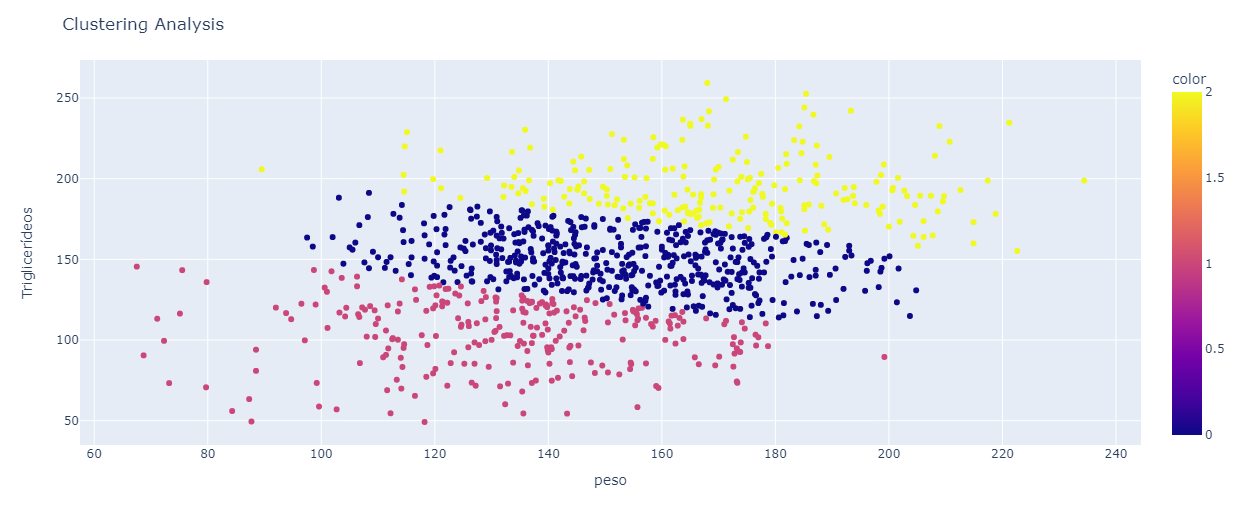

#Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
#Libraries versions:

print(f'''pandas: {pd.__version__}
seaborn: {sns.__version__}
sklearn: {sklearn.__version__}
plotly: {plotly.__version__}''')

pandas: 1.5.3
seaborn: 0.12.2
sklearn: 1.2.2
plotly: 5.13.1


#Datasets import and evaluation

There are three datasets that contains all necessary data for this analysis: Medical Data, Profile Data and Brazilian States.

##Medical Data

In [ ]:
# Importing medical data dataset, from a csv file.

medical_data = pd.read_csv('/content/drive/MyDrive/XPe/Trilha Principal/01 - Analista em Ciência de Dados/Módulo 1 - Introdução à Ciência de Dados/02 - Desafio/dados_medicos.csv', sep=';', encoding='latin-1')
medical_data.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
# Informations about medical data.

medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               989 non-null    float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [ ]:
# Medical data's statistics.

medical_data.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [ ]:
# Looking for missing values.

medical_data.isna().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

In [ ]:
# It was chosen to replace the missing values in the indicated column with the mean of the values in that column, rounded to 2 decimal places.

medical_data = medical_data.fillna(value= {'Colesterol Total': 193.22})

In [ ]:
# Checking if there are no more missing values.

medical_data.isna().sum()

ID                               0
IMC                              0
Pressão Sistólica                0
Pressão Diastólica               0
Nível de Açúcar                  0
peso                             0
Colesterol Total                 0
Triglicerídeos                   0
Histórico Familiar - Cardiaco    0
dtype: int64

##Profile Data

In [ ]:
# Importing profile data dataset, from an excel file.

profile_data = pd.read_excel('/content/drive/MyDrive/XPe/Trilha Principal/01 - Analista em Ciência de Dados/Módulo 1 - Introdução à Ciência de Dados/02 - Desafio/dados_perfil.xlsx')
profile_data.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


In [ ]:
# Informations about profile data.

profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Gênero             1000 non-null   object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  1000 non-null   object 
 4   Atividade Física   1000 non-null   object 
 5   cod_uf             1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
# Profile data's statistics.

profile_data.describe()

,ID,Idade,cod_uf
count,1000.000000,990.000000,1000.000000
mean,500.500000,48.887879,29.289000
std,288.819436,17.940937,13.041993
min,1.000000,18.000000,11.000000
25%,250.750000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,750.250000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


In [ ]:
# Looking for missing values.

profile_data.isna().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

In [ ]:
# It was chosen to exclude the records with missing values.

profile_data.dropna(subset='Idade', inplace=True)

In [ ]:
# Checking if there are no more missing values.

profile_data.isna().sum()

ID                   0
Gênero               0
Idade                0
Consumo de Álcool    0
Atividade Física     0
cod_uf               0
dtype: int64

In [ ]:
# Checking profile data's statistics again. Note that there are now 10 fewer records.

profile_data.describe()

,ID,Idade,cod_uf
count,990.000000,990.000000,990.000000
mean,500.171717,48.887879,29.211111
std,287.750156,17.940937,13.025171
min,1.000000,18.000000,11.000000
25%,253.250000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,747.750000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


##Brazilian States

In [ ]:
# Importing brazilian states dataset, from a csv file.

brazilian_states = pd.read_csv('/content/drive/MyDrive/XPe/Trilha Principal/01 - Analista em Ciência de Dados/Módulo 1 - Introdução à Ciência de Dados/02 - Desafio/unidades_federativas_do_Brasil.csv', sep=';', encoding='latin-1')
brazilian_states.head()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


In [ ]:
# Informations about brazilian states' dataframe.

brazilian_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [ ]:
# Brazilian States' statistics.

brazilian_states.describe()

,codigo_uf,latitude,longitude
count,27.000000,27.000000,27.000000
mean,29.111111,-12.381111,-48.410370
std,13.024631,8.476122,9.291479
min,11.000000,-30.170000,-70.550000
25%,19.000000,-18.645000,-52.990000
50%,27.000000,-10.570000,-48.260000
75%,38.000000,-6.205000,-41.025000
max,53.000000,1.990000,-36.590000


In [ ]:
# Looking for missing values.

brazilian_states.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

#Datasets analysis

In [ ]:
# I will merge the 3 dataframes into one. I will do this in two steps.

# Step 1: Merge medical_data with profile_data into a new dataframe called medical_profile.
medical_profile = pd.merge(medical_data, profile_data, left_on='ID', right_on='ID')

# Step 2: Merge the medical_profile dataframe created above with the brazilian_states dataframe and assign it to a new dataframe called patients.
patients = pd.merge(medical_profile, brazilian_states,left_on='cod_uf', right_on='codigo_uf')

patients.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,...,Consumo de Álcool,Atividade Física,cod_uf,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim,M,...,Moderado,Atividade Moderada,31,31,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil
1,6,24.2,165,81,Normal,148.6,183.3,154.3,Não,F,...,Moderado,Atividade Moderada,31,31,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil
2,65,35.2,109,61,Normal,173.3,165.2,73.5,Sim,M,...,Moderado,Atividade Moderada,31,31,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil
3,97,25.3,170,95,Alto,153.6,141.7,140.5,Não,M,...,Baixo,Atividade Moderada,31,31,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil
4,98,20.8,148,65,Normal,129.0,150.1,156.9,Não,F,...,Moderado,Atividade Moderada,31,31,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil


In [ ]:
# I will perform the count below just to list the names of all columns, as I want to rearrange them.

patients.count()

ID                               990
IMC                              990
Pressão Sistólica                990
Pressão Diastólica               990
Nível de Açúcar                  990
peso                             990
Colesterol Total                 990
Triglicerídeos                   990
Histórico Familiar - Cardiaco    990
Gênero                           990
Idade                            990
Consumo de Álcool                990
Atividade Física                 990
cod_uf                           990
codigo_uf                        990
uf                               990
nome                             990
latitude                         990
longitude                        990
regiao                           990
pais                             990
dtype: int64

In [ ]:
# Selecting and organizing the column names.

patients = patients[['ID', 'IMC', 'Pressão Sistólica', 'Pressão Diastólica', 'Nível de Açúcar', 'peso', 'Colesterol Total', 'Triglicerídeos',
 'Histórico Familiar - Cardiaco', 'Gênero', 'Idade', 'Consumo de Álcool', 'Atividade Física', 'cod_uf', 'uf', 'regiao', 'pais']]

patients.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,regiao,pais
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim,M,74.0,Moderado,Atividade Moderada,31,MG,Sudeste,Brasil
1,6,24.2,165,81,Normal,148.6,183.3,154.3,Não,F,78.0,Moderado,Atividade Moderada,31,MG,Sudeste,Brasil
2,65,35.2,109,61,Normal,173.3,165.2,73.5,Sim,M,41.0,Moderado,Atividade Moderada,31,MG,Sudeste,Brasil
3,97,25.3,170,95,Alto,153.6,141.7,140.5,Não,M,58.0,Baixo,Atividade Moderada,31,MG,Sudeste,Brasil
4,98,20.8,148,65,Normal,129.0,150.1,156.9,Não,F,22.0,Moderado,Atividade Moderada,31,MG,Sudeste,Brasil


Creating labels for categorical variables

In [ ]:
# Import the label encoder

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [ ]:
# Using label encoder to apply a code index for each categoric variable

patients['id_Nível_de_Açúcar'] = LE.fit_transform(patients['Nível de Açúcar'])
patients['id_Histórico_Familiar_Cardiaco'] = LE.fit_transform(patients['Histórico Familiar - Cardiaco'])
patients['id_genero'] = LE.fit_transform(patients['Gênero'])
patients['id_Consumo_de_Álcool'] = LE.fit_transform(patients['Consumo de Álcool'])
patients['id_Atividade_Física'] = LE.fit_transform(patients['Atividade Física'])

patients.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,...,Atividade Física,cod_uf,uf,regiao,pais,id_Nível_de_Açúcar,id_Histórico_Familiar_Cardiaco,id_genero,id_Consumo_de_Álcool,id_Atividade_Física
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim,M,...,Atividade Moderada,31,MG,Sudeste,Brasil,1,1,1,2,0
1,6,24.2,165,81,Normal,148.6,183.3,154.3,Não,F,...,Atividade Moderada,31,MG,Sudeste,Brasil,1,0,0,2,0
2,65,35.2,109,61,Normal,173.3,165.2,73.5,Sim,M,...,Atividade Moderada,31,MG,Sudeste,Brasil,1,1,1,2,0
3,97,25.3,170,95,Alto,153.6,141.7,140.5,Não,M,...,Atividade Moderada,31,MG,Sudeste,Brasil,0,0,1,1,0
4,98,20.8,148,65,Normal,129.0,150.1,156.9,Não,F,...,Atividade Moderada,31,MG,Sudeste,Brasil,1,0,0,2,0


Checking the correlation between the diferents varialbes

<Axes: title={'center': 'Variables Correlations'}>

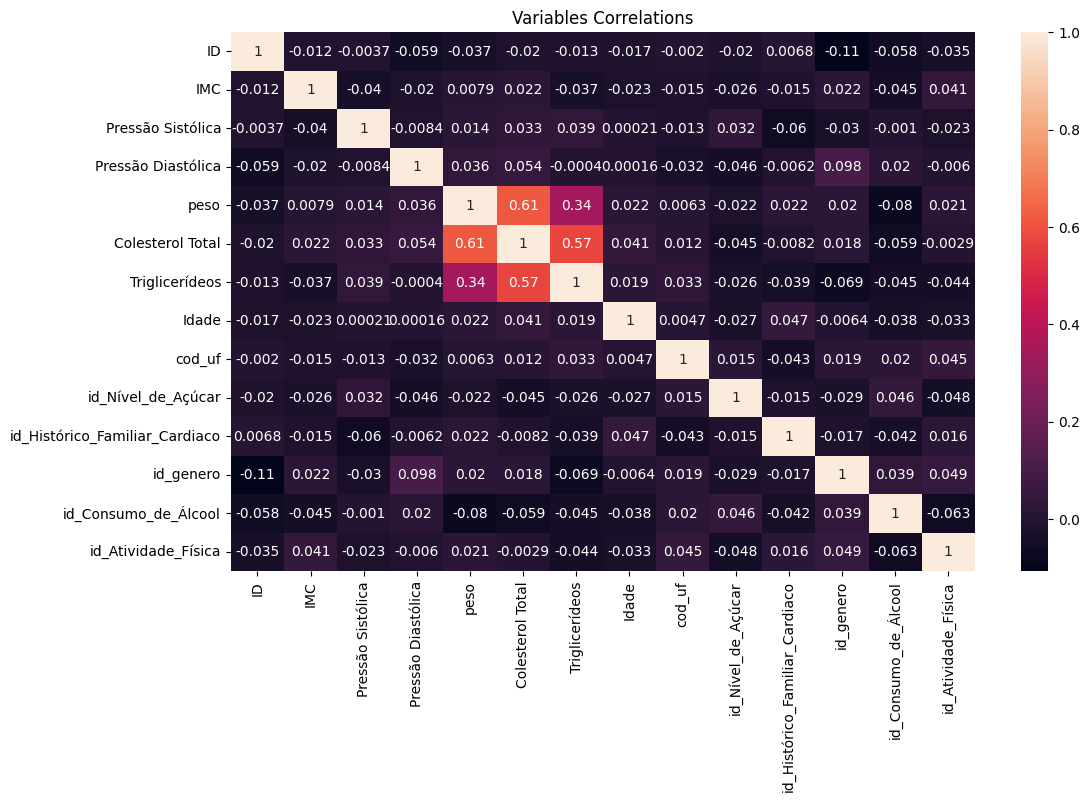

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Variables Correlations')
sns.heatmap(patients.corr(numeric_only= bool), annot=True) 

It has been found that there is a significant correlation between the variables 'peso,' 'Colesterol Total' and 'Triglicerídeos'.

<Axes: title={'center': 'Variables Correlations'}>

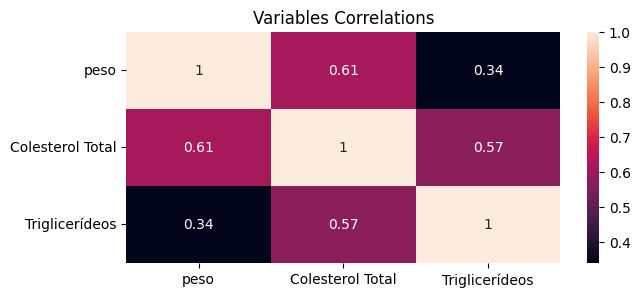

In [ ]:
plt.figure(figsize=(7,3))
plt.title('Variables Correlations')
sns.heatmap(patients[['peso', 'Colesterol Total', 'Triglicerídeos']].corr(numeric_only= bool), annot=True) 

#Applying the k-means model

In [ ]:
# import k-means method

from sklearn.cluster import KMeans

In [ ]:
# Function to calculate wcss (within-clusters sum-of-squares).

def calculate_wcss(input_data):
  wcss= []
  for k in range(1,11):
    kmeans =  KMeans(n_clusters= k, random_state=0, init='k-means++', n_init=10)
    kmeans.fit(X=input_data)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
# Selecting only columns 'peso' e 'Triglicerídeos' from patients.

patients[['peso', 'Triglicerídeos']].head()

,peso,Triglicerídeos
0,162.1,152.6
1,148.6,154.3
2,173.3,73.5
3,153.6,140.5
4,129.0,156.9


In [ ]:
# Calculate the wcss values for patients dataframe, with only 'peso' e 'Triglicerídeos' columns.

patients_wcss = calculate_wcss(patients[['peso', 'Triglicerídeos']])
patients_wcss

[2015696.2225858571,
 1111177.27275397,
 836803.9221592899,
 620727.9449389006,
 515606.8475207895,
 435227.42716824857,
 385266.0760619425,
 345221.108775205,
 309256.4440449179,
 275406.31509892107]

In [ ]:
# Print the wcss graphic

wcss_chart = px.line( x=range(1,11),
                      y=patients_wcss
                     )
fig = go.Figure(wcss_chart)
fig.update_layout(title = 'WCSS',
                  title_x = 0.5,
                  xaxis_title = 'Number of Clusters',
                  yaxis_title = 'WCSS Value',
                  template = 'plotly_white'
                  )
fig.show()

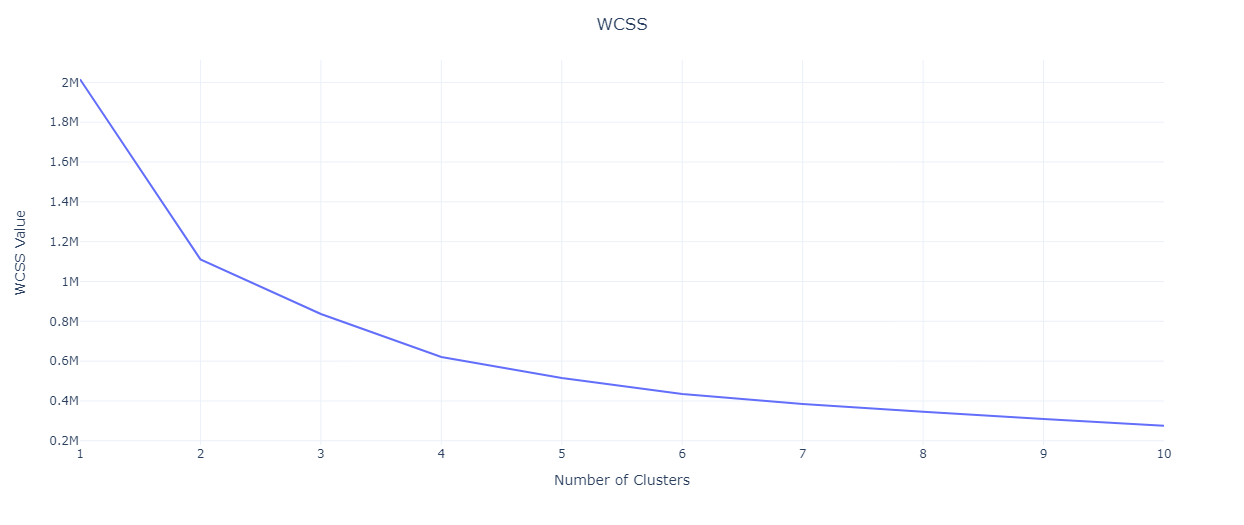

In [ ]:
# According chart's evaluation, we can use 4 clusters for this model. However, the business rules require 3. So, we'll use 3.

patients_kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

# Adding a column to receive the cluster number and assingning values to the column
patients['cluster'] = patients_kmeans.fit_predict(patients[['peso', 'Triglicerídeos']])

patients.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,...,cod_uf,uf,regiao,pais,id_Nível_de_Açúcar,id_Histórico_Familiar_Cardiaco,id_genero,id_Consumo_de_Álcool,id_Atividade_Física,cluster
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim,M,...,31,MG,Sudeste,Brasil,1,1,1,2,0,0
1,6,24.2,165,81,Normal,148.6,183.3,154.3,Não,F,...,31,MG,Sudeste,Brasil,1,0,0,2,0,0
2,65,35.2,109,61,Normal,173.3,165.2,73.5,Sim,M,...,31,MG,Sudeste,Brasil,1,1,1,2,0,1
3,97,25.3,170,95,Alto,153.6,141.7,140.5,Não,M,...,31,MG,Sudeste,Brasil,0,0,1,1,0,0
4,98,20.8,148,65,Normal,129.0,150.1,156.9,Não,F,...,31,MG,Sudeste,Brasil,1,0,0,2,0,0


In [ ]:
# Print the scatter chart

cluster_chart = px.scatter(x = patients['peso'],
                           y = patients['Triglicerídeos'],
                           color = patients['cluster'])
cluster_chart.update_layout(title = 'Clustering Analysis',
                            xaxis_title = 'peso',
                            yaxis_title = 'Triglicerídeos'
                            )
cluster_chart.show()

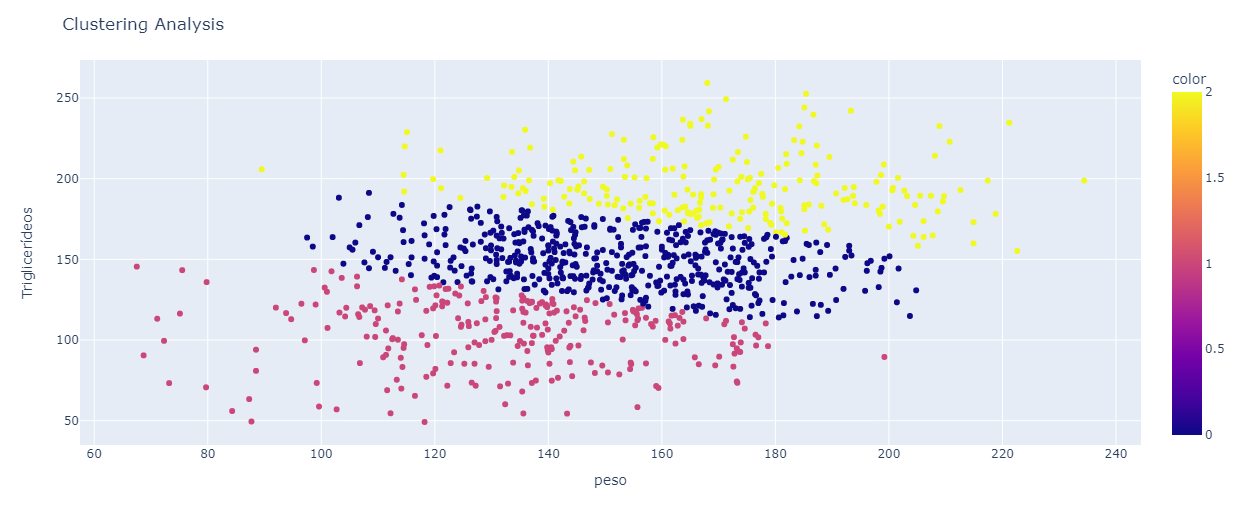

In [ ]:
# Renaming the values 0,1,2 of the clusters to the risks names required for the business rules.

patients.loc[patients['cluster']==1, 'cluster_name'] = 'Risco Intermediário'
patients.loc[patients['cluster']==0, 'cluster_name'] = 'Risco Alto'
patients.loc[patients['cluster']==2, 'cluster_name'] = 'Risco Muito Alto'

patients.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,Gênero,...,uf,regiao,pais,id_Nível_de_Açúcar,id_Histórico_Familiar_Cardiaco,id_genero,id_Consumo_de_Álcool,id_Atividade_Física,cluster,cluster_name
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim,M,...,MG,Sudeste,Brasil,1,1,1,2,0,0,Risco Alto
1,6,24.2,165,81,Normal,148.6,183.3,154.3,Não,F,...,MG,Sudeste,Brasil,1,0,0,2,0,0,Risco Alto
2,65,35.2,109,61,Normal,173.3,165.2,73.5,Sim,M,...,MG,Sudeste,Brasil,1,1,1,2,0,1,Risco Intermediário
3,97,25.3,170,95,Alto,153.6,141.7,140.5,Não,M,...,MG,Sudeste,Brasil,0,0,1,1,0,0,Risco Alto
4,98,20.8,148,65,Normal,129.0,150.1,156.9,Não,F,...,MG,Sudeste,Brasil,1,0,0,2,0,0,Risco Alto


# Questions

After data collection and preprocessing, construct a histogram of the age distribution of patients. Generate a chart with 20 bars.

<Axes: title={'center': 'Pacients age'}, xlabel='Idade', ylabel='Count'>

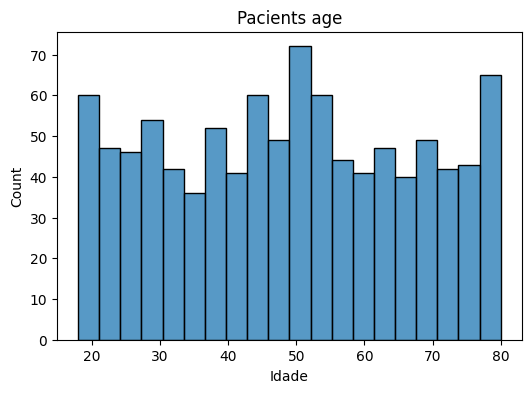

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Pacients age')
sns.histplot(x='Idade', data=patients, bins=20)

Present the result of the boxplot diagram between the variables triglyceride quantity ('Triglicerídeos') and cluster.

<Axes: title={'center': 'Boxplot chart'}, xlabel='Triglicerídeos', ylabel='cluster_name'>

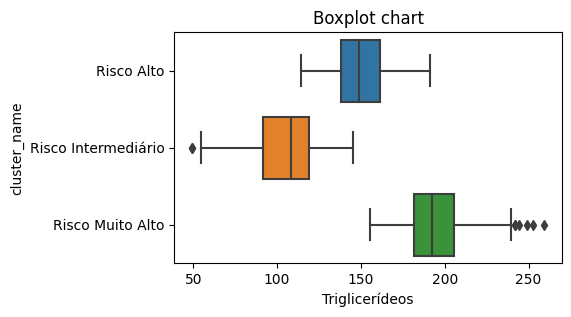

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Boxplot chart')
sns.boxplot(x='Triglicerídeos', y='cluster_name', data=patients, orient='h')

How many women are there in the very high-risk cluster?

In [ ]:
# It can be observed that there are 102 women in the very high-risk cluster

patients.groupby(['cluster_name', 'Gênero'], as_index=False).agg(total=('Gênero', 'count'))

,cluster_name,Gênero,total
0,Risco Alto,F,261
1,Risco Alto,M,243
2,Risco Intermediário,F,125
3,Risco Intermediário,M,141
4,Risco Muito Alto,F,118
5,Risco Muito Alto,M,102


Which state has the highest number of individuals in the high-risk group?

In [ ]:
# It can be observed that PB is the state with the highest number of individuals in the high-risk group. There are 28 individuals in this state.

patients.groupby('cluster_name')['uf'].describe()

,count,unique,top,freq
cluster_name,,,,
Risco Alto,504,27,PB,28
Risco Intermediário,266,27,AM,20
Risco Muito Alto,220,27,AP,13


Which group has the highest number of individuals with low alcohol consumption?

In [ ]:
# It can be observed that the high-risk group has the highest number of individuals with low alcohol consumption. There are 307 individuals in this group.

patients[patients['Consumo de Álcool'] == 'Baixo'].groupby('cluster_name')['ID'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_name,,,,,,,,
Risco Alto,307.0,522.915309,297.403853,2.0,260.50,542.0,777.0,1000.0
Risco Intermediário,151.0,497.284768,281.391788,15.0,248.50,484.0,741.5,999.0
Risco Muito Alto,132.0,493.196970,286.846035,19.0,233.25,492.0,731.0,977.0


Which region has the highest value for the variable 'triglicerídeos'?

In [ ]:
# The highest value for the variable 'triglicerídeos' is 259.3. This value is in the region 'Nordeste'.

patients.groupby(['regiao'])['Triglicerídeos'].max()

regiao
Centro-Oeste    249.3
Nordeste        259.3
Norte           228.8
Sudeste         244.1
Sul             242.1
Name: Triglicerídeos, dtype: float64

What is the average weight ('peso') of males present in the intermediate risk group?

In [ ]:
# The mean value of 'peso' in the intermediate risk group is 134.68 (round).

patients[patients['Gênero'] == 'M'].groupby('cluster_name')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_name,,,,,,,,
Risco Alto,243.0,152.281070,21.511100,97.5,137.150,152.8,168.800,203.7
Risco Intermediário,141.0,134.677305,23.735264,67.5,120.300,135.6,150.500,199.2
Risco Muito Alto,102.0,171.894118,26.199126,89.5,154.875,172.1,191.475,234.4


Construct a histogram of weight distribution for patients in the high-risk group. Generate a chart with 30 bars.

<Axes: title={'center': 'High Risk Pacients Weight'}, xlabel='peso', ylabel='Count'>

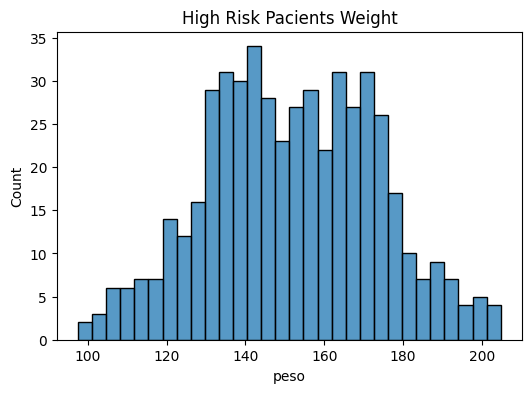

In [ ]:
high_risk_patients = patients[patients['cluster_name'] == 'Risco Alto']

plt.figure(figsize=(6,4))
plt.title('High Risk Pacients Weight')
sns.histplot(x='peso', data=high_risk_patients, bins=30)

Which state has the highest number of individuals with normal sugar levels?

In [ ]:
# The stata MG has the highest number of individuals with normal suger levels.

patients[patients['Nível de Açúcar'] == 'Normal'].groupby(['uf'])['ID'].count()

uf
AC    29
AL    33
AM    36
AP    23
BA    23
CE    20
DF    32
ES    22
GO    33
MA    33
MG    36
MS    26
MT    30
PA    28
PB    35
PE    30
PI    26
PR    35
RJ    24
RN    20
RO    30
RR    33
RS    28
SC    27
SE    35
SP    30
TO    23
Name: ID, dtype: int64

Which region has the highest average systolic blood pressure ('pressão sistólica') for the high-risk group?

In [ ]:
# It's the region 'Sul'

patients[patients['cluster_name'] == 'Risco Alto'].groupby(['regiao'])['Pressão Sistólica'].mean()

regiao
Centro-Oeste    128.753247
Nordeste        130.543353
Norte           129.806723
Sudeste         126.986842
Sul             133.627119
Name: Pressão Sistólica, dtype: float64